<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lo que falta.
-cambiar las ultimas actualizaciones format a solo mostrar dia mes y año, ocultar segundos
-quitar los decimales en todos los numeros que terminan en ".0".

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive. before uploading to Github only enable directory = "" and silence the rest.


In [81]:
directory = ""
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Dependencias: importante!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



#other important requirements

In [83]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
ordenado

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [84]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


Bolivia   La Paz  Cochabamba  ...  Tarija    Beni   Pando
NaN  11620000  2927000     2029000  ...  583000  480000  154000

[1 rows x 10 columns]

# CASOS

Casos diarios y acumulados

In [85]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios.index[-1]

Timestamp('2021-07-01 00:00:00')

In [86]:
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [87]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  ...  Tarija   Beni  Pando
2020-03-10        0       0           0  ...       0      0      0
2020-03-11        1       0           0  ...       0      0      0
2020-03-12        1       0           0  ...       0      0      0
2020-03-13        8       0           1  ...       0      0      0
2020-03-14        8       0           1  ...       0      0      0
...             ...     ...         ...  ...     ...    ...    ...
2021-06-27   433934   89969       63895  ...   33242  19633   6606
2021-06-28   435567   90201       64248  ...   33372  19674   6621
2021-06-29   437622   90708       64693  ...   33501  19714   6630
2021-06-30   439623   91097       65098  ...   33610  19738   6643
2021-07-01   441285   91367       65471  ...   33713  19785   6654

[479 rows x 10 columns]

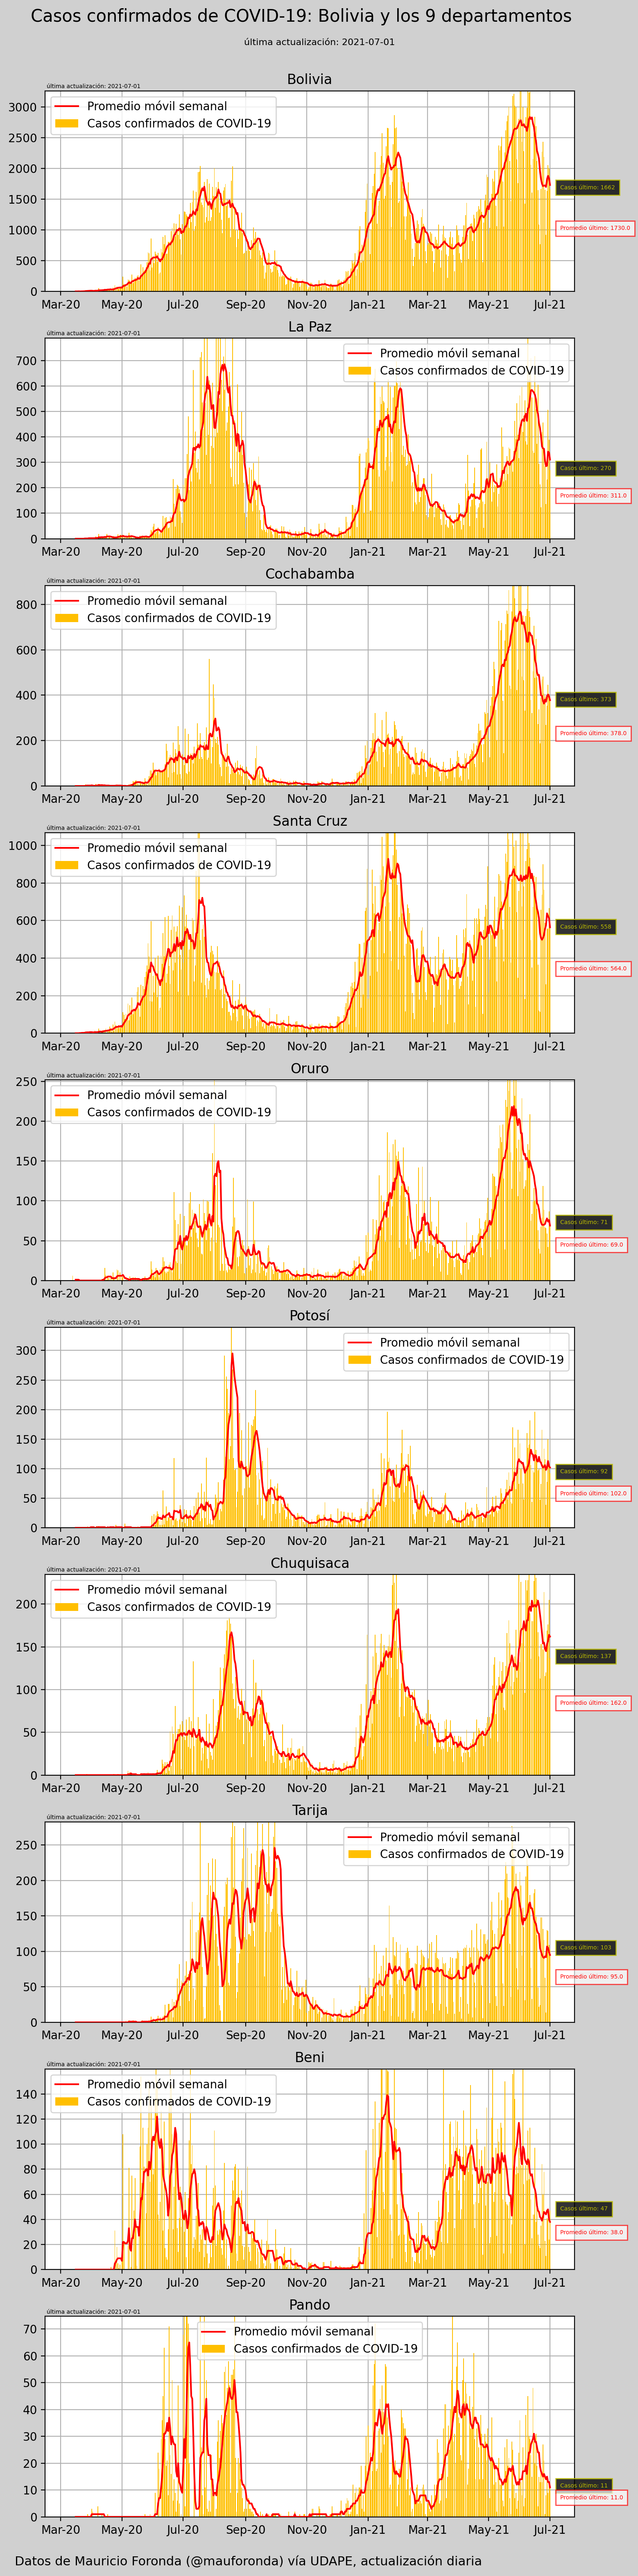

In [88]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.39, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"
fig.set_facecolor(background_color)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(.4, 1.015,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], color = "#ffbf00", label="Casos confirmados de COVID-19",width = .75, zorder=2)
  axs[i].set_title(casos_diarios.columns[i])
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Casos último: " + str(casos_diarios.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios.iloc[-1,i]),
      fontsize=5,
      color = "y",
      bbox={
              'edgecolor': 'y',
              'facecolor': 'black', 
              'alpha': .8}
          )
  
  axs[i].annotate( "Promedio último: " + str(casos_diarios7.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios.iloc[-1,i]*.6),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .7}
          )
  axs[i].text(casos_diarios7.index[1] - datetime.timedelta(days=24), casos_diarios7[casos_diarios7.columns[i]].max()*1.166,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=5)




fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [89]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  ...  Tarija  Beni  Pando
2020-03-10        0       0           0  ...       0     0      0
2020-03-11        0       0           0  ...       0     0      0
2020-03-12        0       0           0  ...       0     0      0
2020-03-13        0       0           0  ...       0     0      0
2020-03-14        0       0           0  ...       0     0      0
...             ...     ...         ...  ...     ...   ...    ...
2021-06-27       30       5          10  ...       1     2      0
2021-06-28       50       5          17  ...       4     1      1
2021-06-29       71       6          16  ...       3     2      3
2021-06-30       65       7          13  ...       3     4      1
2021-07-01       55       7           5  ...       2     4      1

[479 rows x 10 columns]

In [90]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

Bolivia  La Paz  Cochabamba  ...  Tarija  Beni  Pando
2021-06-27     64.1     6.3        15.9  ...     2.4   2.0    1.0
2021-06-28     65.3     5.9        16.7  ...     2.7   2.0    0.7
2021-06-29     65.6     5.9        16.1  ...     2.6   1.9    0.7
2021-06-30     62.6     6.3        14.6  ...     2.3   2.3    0.9
2021-07-01     58.3     6.3        12.6  ...     2.4   2.9    1.0

[5 rows x 10 columns]

In [91]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  ...  Tarija  Beni  Pando
2020-03-10        0       0           0  ...       0     0      0
2020-03-11        0       0           0  ...       0     0      0
2020-03-12        0       0           0  ...       0     0      0
2020-03-13        0       0           0  ...       0     0      0
2020-03-14        0       0           0  ...       0     0      0
...             ...     ...         ...  ...     ...   ...    ...
2021-06-27    14954    2299        2508  ...     843   836    308
2021-06-28    15004    2304        2525  ...     847   837    309
2021-06-29    15075    2310        2541  ...     850   839    312
2021-06-30    15140    2317        2554  ...     853   843    313
2021-07-01    15195    2324        2559  ...     855   847    314

[479 rows x 10 columns]

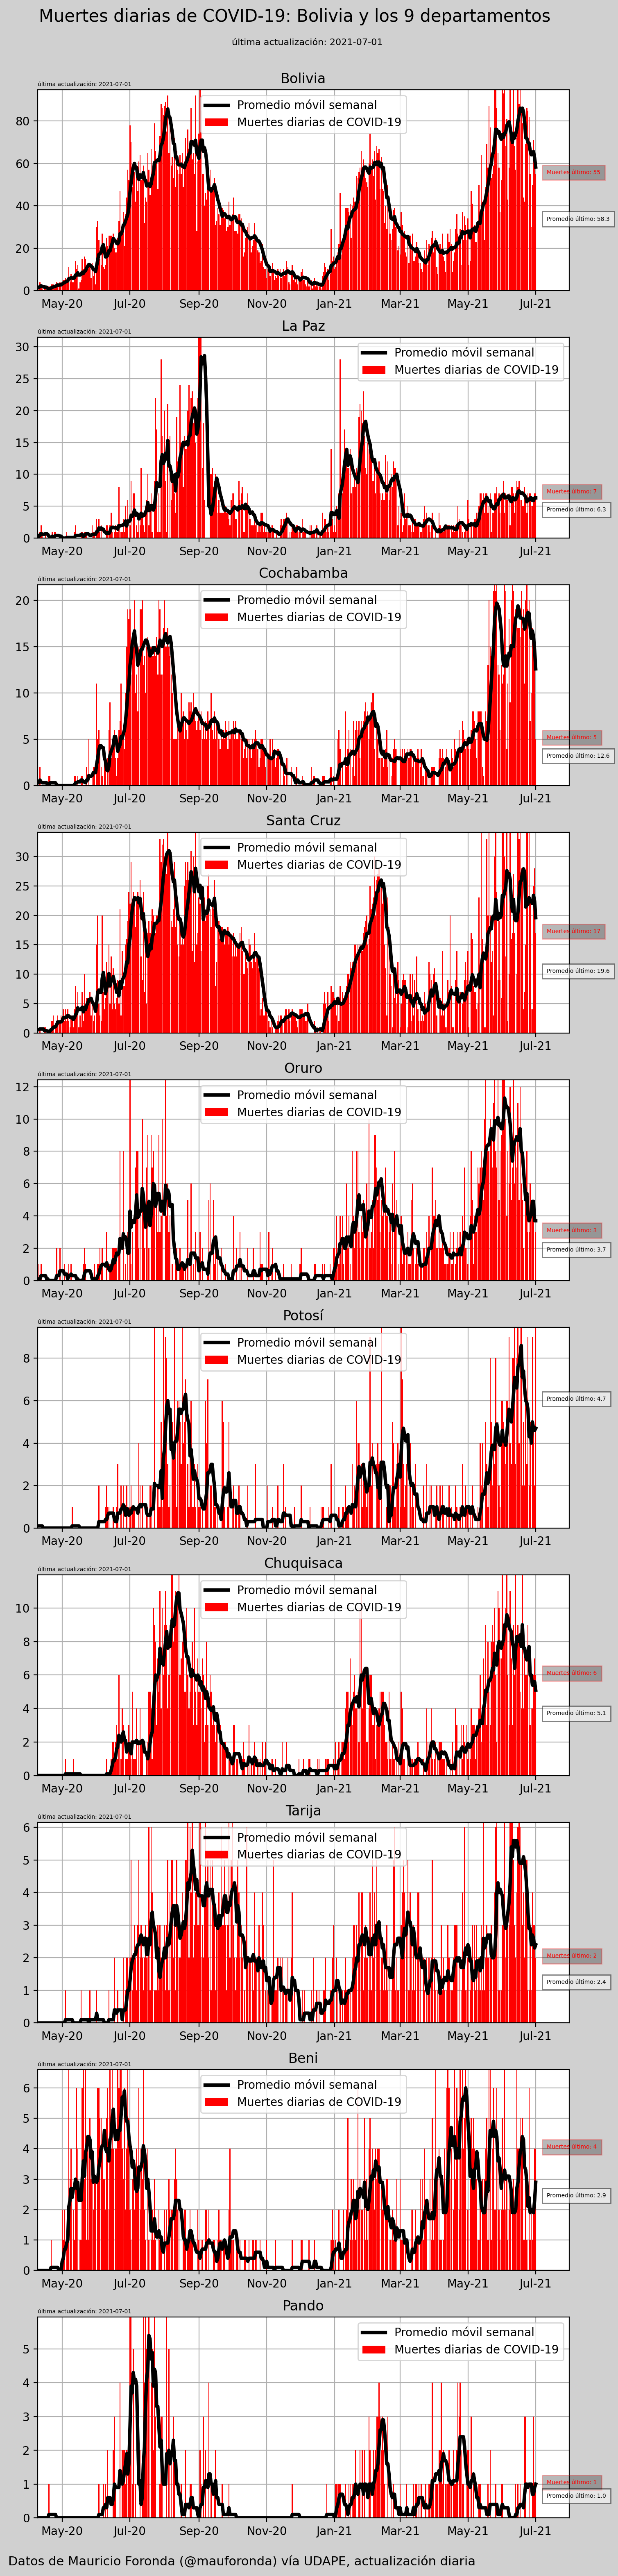

In [92]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(0.39, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", label="Muertes diarias de COVID-19",width=.9,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i])
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Muertes último: " + str(muertes_diarias.iloc[-1,i]),
      xy = (muertes_diarias.index[-1] + datetime.timedelta(days=10), muertes_diarias.iloc[-1,i]),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'black', 
              'alpha': .28}
          )
  
  axs[i].annotate( "Promedio último: " + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=10), muertes_diarias.iloc[-1,i]*.6),
      fontsize=5,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .5}
          )

  axs[i].text(muertes_diarias7.index[30], muertes_diarias7[muertes_diarias7.columns[i]].max()*1.12,"última actualización: {}".format(muertes_diarias7.index[-1].date()), fontsize=5)


fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [93]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [94]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [95]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [96]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [97]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

Bolivia    La Paz  Cochabamba  ...   Tarija     Beni    Pando
2021-06-27  1798584.0  361185.0    318613.0  ...  97225.0  61641.0  23532.0
2021-06-28  1809064.0  362296.0    321901.0  ...  97843.0  61858.0  23652.0
2021-06-29  1821488.0  365055.0    325076.0  ...  98445.0  62126.0  23720.0
2021-06-30  1834319.0  368005.0    327583.0  ...  98957.0  62388.0  23804.0
2021-07-01  1834319.0  368005.0    327583.0  ...  98957.0  62388.0  23804.0

[5 rows x 10 columns]

In [98]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

Bolivia  La Paz  Cochabamba  ...  Tarija   Beni  Pando
2021-06-27   6341.0  1157.0      2143.0  ...   118.0   98.0   69.0
2021-06-28  10480.0  1111.0      3288.0  ...   618.0  217.0  120.0
2021-06-29  12424.0  2759.0      3175.0  ...   602.0  268.0   68.0
2021-06-30  12831.0  2950.0      2507.0  ...   512.0  262.0   84.0
2021-07-01      NaN     NaN         NaN  ...     NaN    NaN    NaN

[5 rows x 10 columns]

In [99]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

Bolivia       La Paz  ...        Beni      Pando
2020-05-07           NaN          NaN  ...         NaN        NaN
2020-05-08    457.000000   128.000000  ...   81.000000   3.000000
2020-05-09    537.750000   125.500000  ...   45.000000   4.166667
2020-05-10    564.666667   107.333333  ...   32.333333   4.555556
2020-05-11    578.125000   101.250000  ...   45.250000   4.750000
...                  ...          ...  ...         ...        ...
2021-06-27  10069.142857  2263.000000  ...  233.000000  75.714286
2021-06-28  10974.714286  2226.428571  ...  248.285714  87.571429
2021-06-29  11202.857143  2463.428571  ...  258.000000  83.428571
2021-06-30  11085.428571  2382.285714  ...  258.142857  82.571429
2021-07-01  10720.500000  2241.333333  ...  218.500000  78.833333

[421 rows x 10 columns]

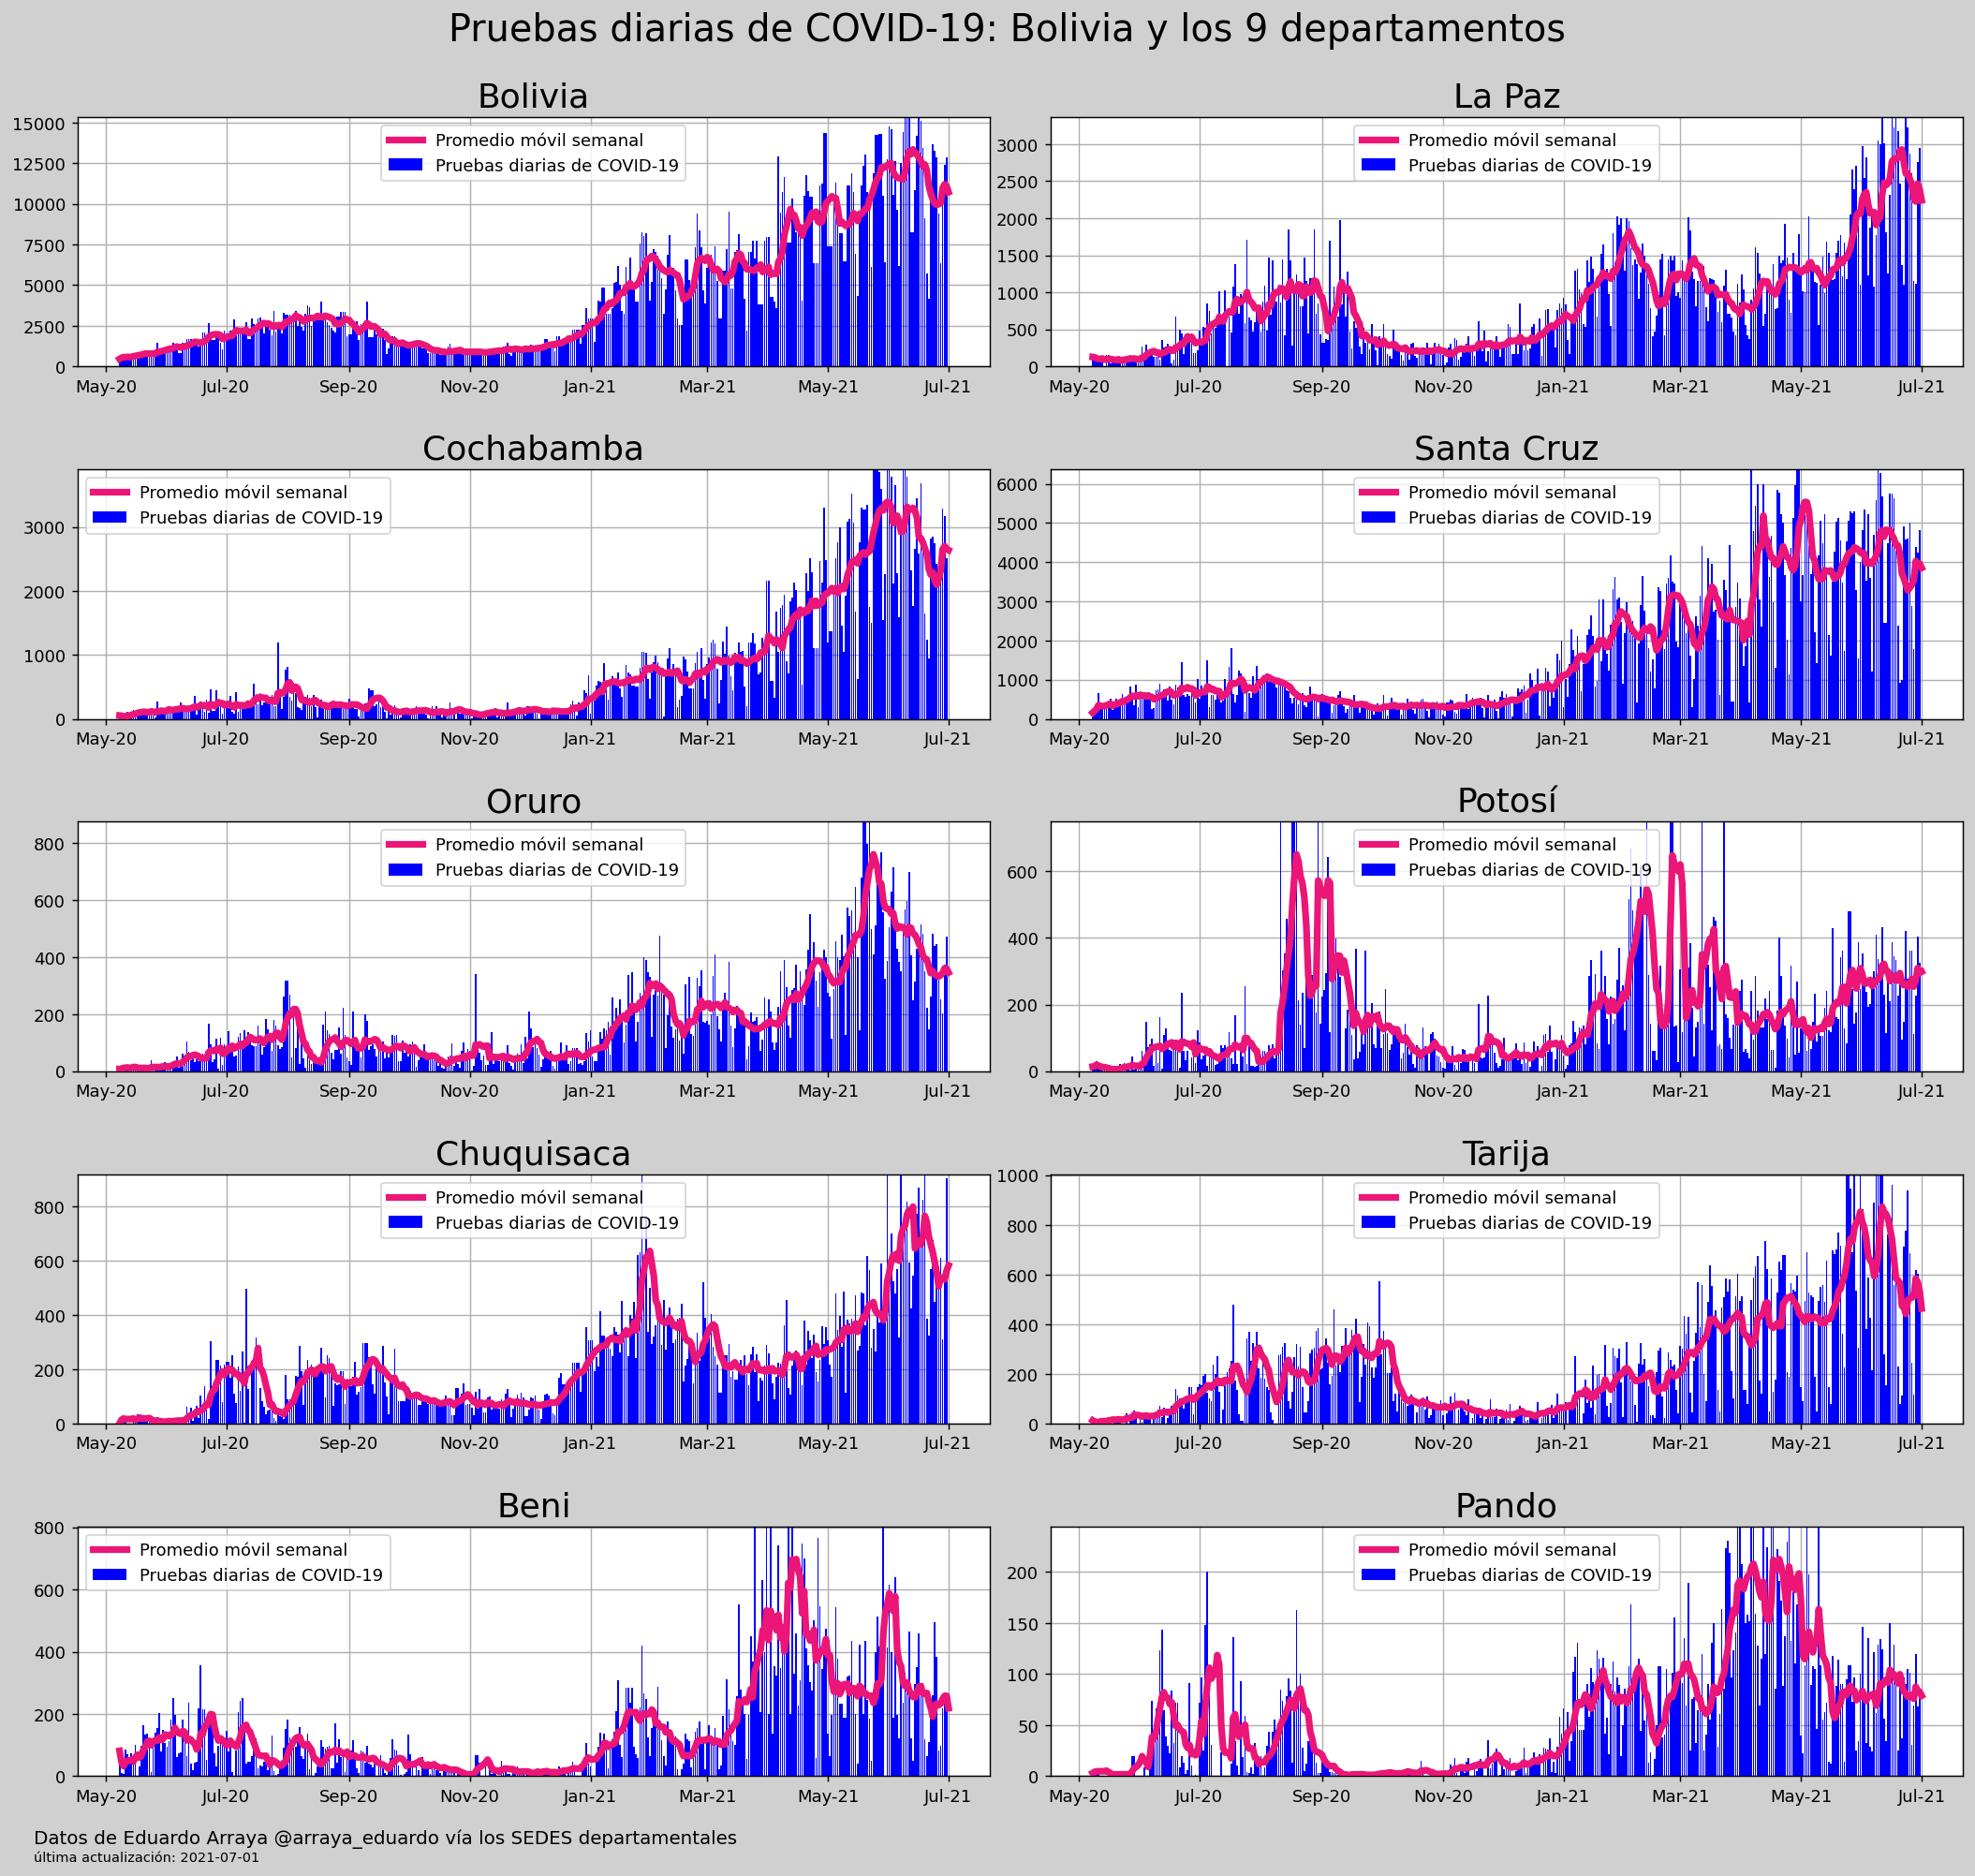

In [100]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=130)
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=4)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.055)
fig.text(0.0,-.02,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=11)
fig.text(0, -.03,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [101]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

Bolivia    La Paz  Cochabamba  ...    Tarija      Beni     Pando
2020-05-08  0.404814  0.179688    0.153846  ...  0.230769  1.000000  0.000000
2020-05-09  0.276475  0.056911    0.108696  ...  0.500000  0.000000  0.000000
2020-05-10  0.192401  0.112676    0.529412  ...       NaN  0.285714  0.000000
2020-05-11  0.444624  0.048193    0.555556  ...  0.000000  0.892857  0.000000
2020-05-12  0.215036  0.029126    0.179487  ...  0.136364  0.000000       NaN
...              ...       ...         ...  ...       ...       ...       ...
2021-06-27  0.145403  0.117545    0.125058  ...  0.118644  0.112245  0.115942
2021-06-28  0.155821  0.208821    0.107360  ...  0.210356  0.188940  0.125000
2021-06-29  0.165406  0.183762    0.140157  ...  0.214286  0.149254  0.132353
2021-06-30  0.155950  0.131864    0.161548  ...  0.212891  0.091603  0.154762
2021-07-01       NaN       NaN         NaN  ...       NaN       NaN       NaN

[420 rows x 10 columns]

In [102]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [103]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

Bolivia    La Paz  Cochabamba  ...    Tarija      Beni     Pando
2020-05-08  0.404814  0.179688    0.153846  ...  0.230769  1.000000  0.000000
2020-05-09  0.340645  0.118299    0.131271  ...  0.365385  0.500000  0.000000
2020-05-10  0.291230  0.116425    0.263985  ...  0.365385  0.428571  0.000000
2020-05-11  0.329579  0.099367    0.336877  ...  0.243590  0.544643  0.000000
2020-05-12  0.306670  0.085319    0.305399  ...  0.216783  0.435714  0.000000
...              ...       ...         ...  ...       ...       ...       ...
2021-06-27  0.168406  0.125863    0.163448  ...  0.184940  0.195459  0.183474
2021-06-28  0.164310  0.133435    0.150305  ...  0.184916  0.200372  0.151138
2021-06-29  0.165944  0.143583    0.150549  ...  0.185875  0.196694  0.145009
2021-06-30  0.164471  0.145406    0.150061  ...  0.189006  0.163803  0.146483
2021-07-01  0.161374  0.146045    0.145888  ...  0.197028  0.170942  0.128039

[420 rows x 10 columns]

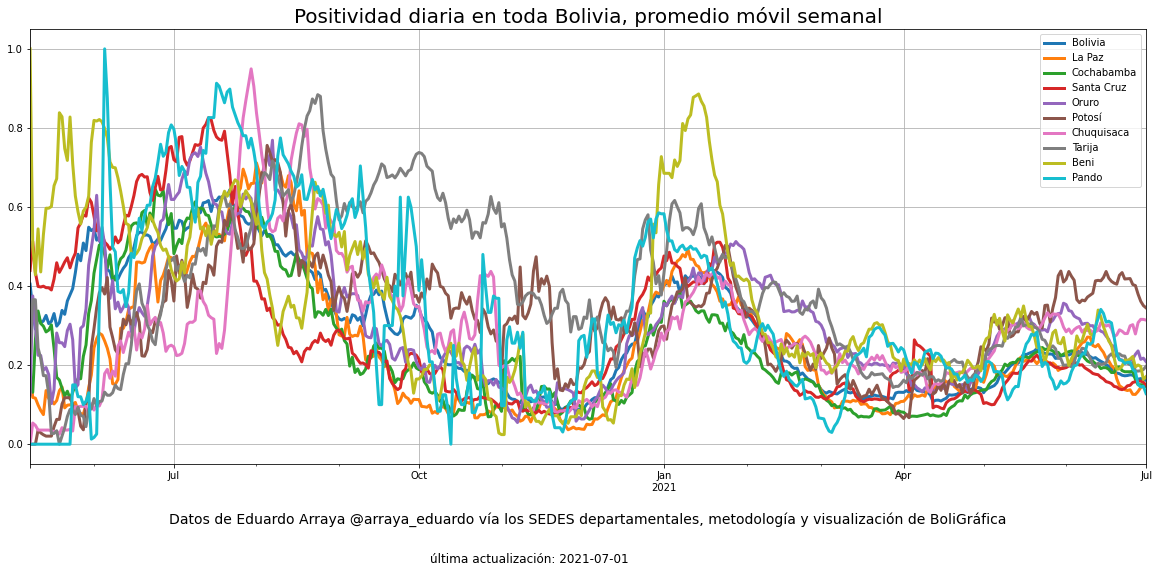

In [104]:
positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3)

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia, promedio móvil semanal", fontsize =20)

plt.text(18442,-.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18540, -.3,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)
#axs.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
#.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))


plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", dpi=120)

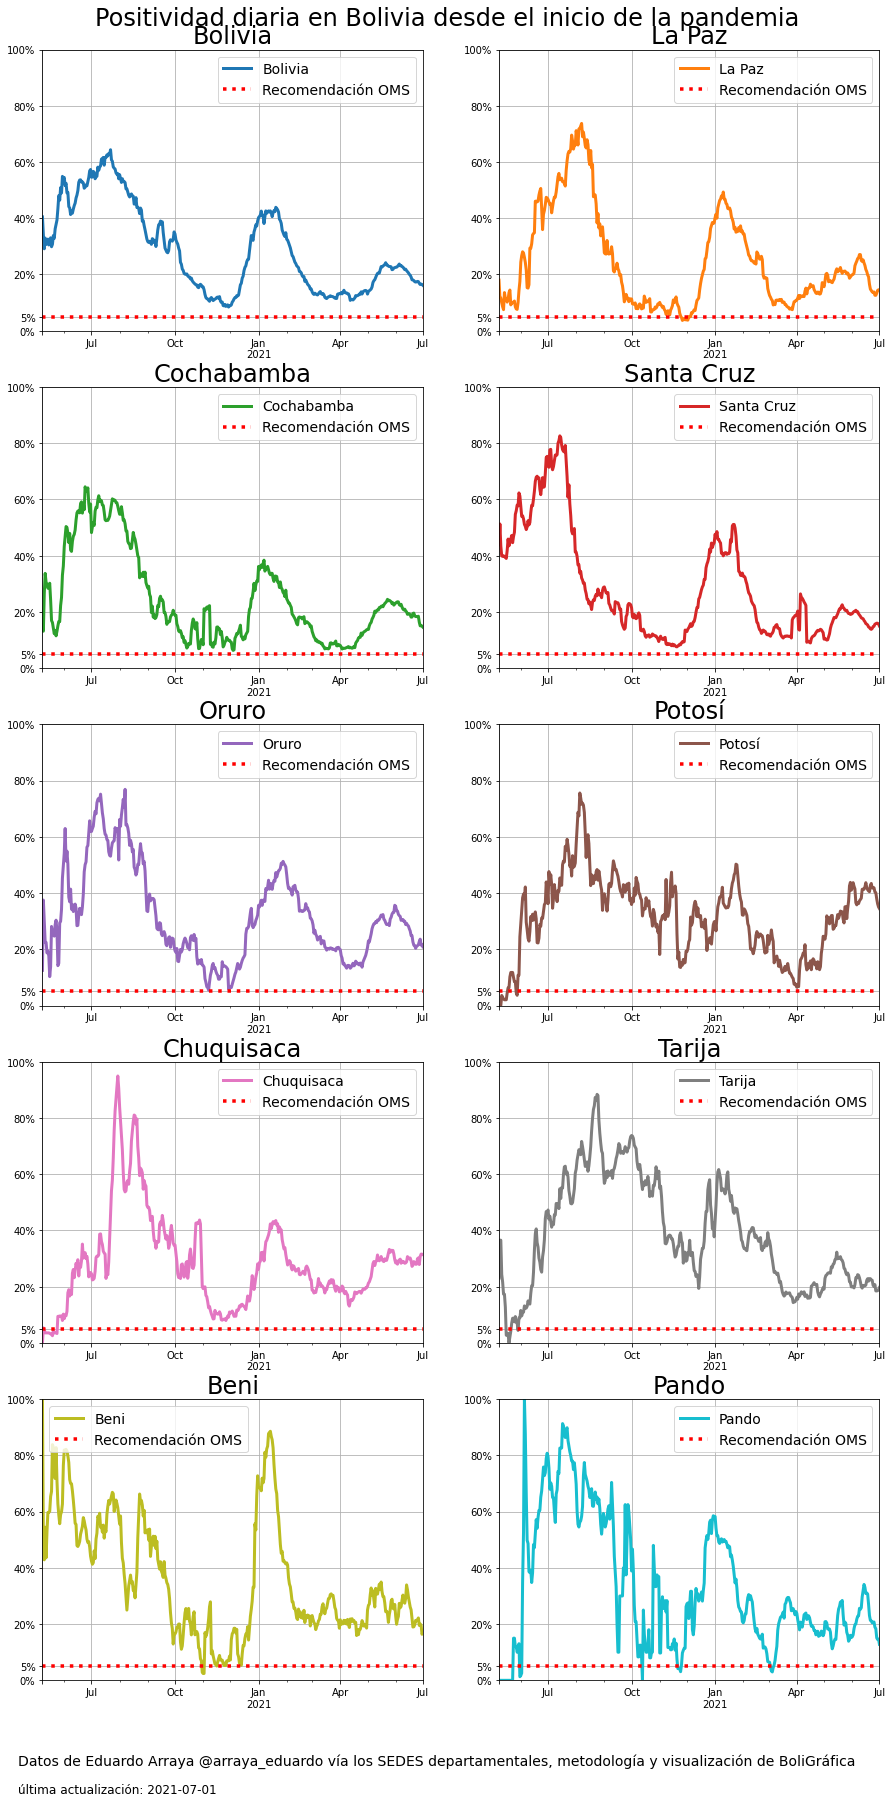

In [105]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3)

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde el inicio de la pandemia', y=.9, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.text(17860,-.3,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(17860, -.4,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)

plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", dpi=120)

In [106]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

#MIX

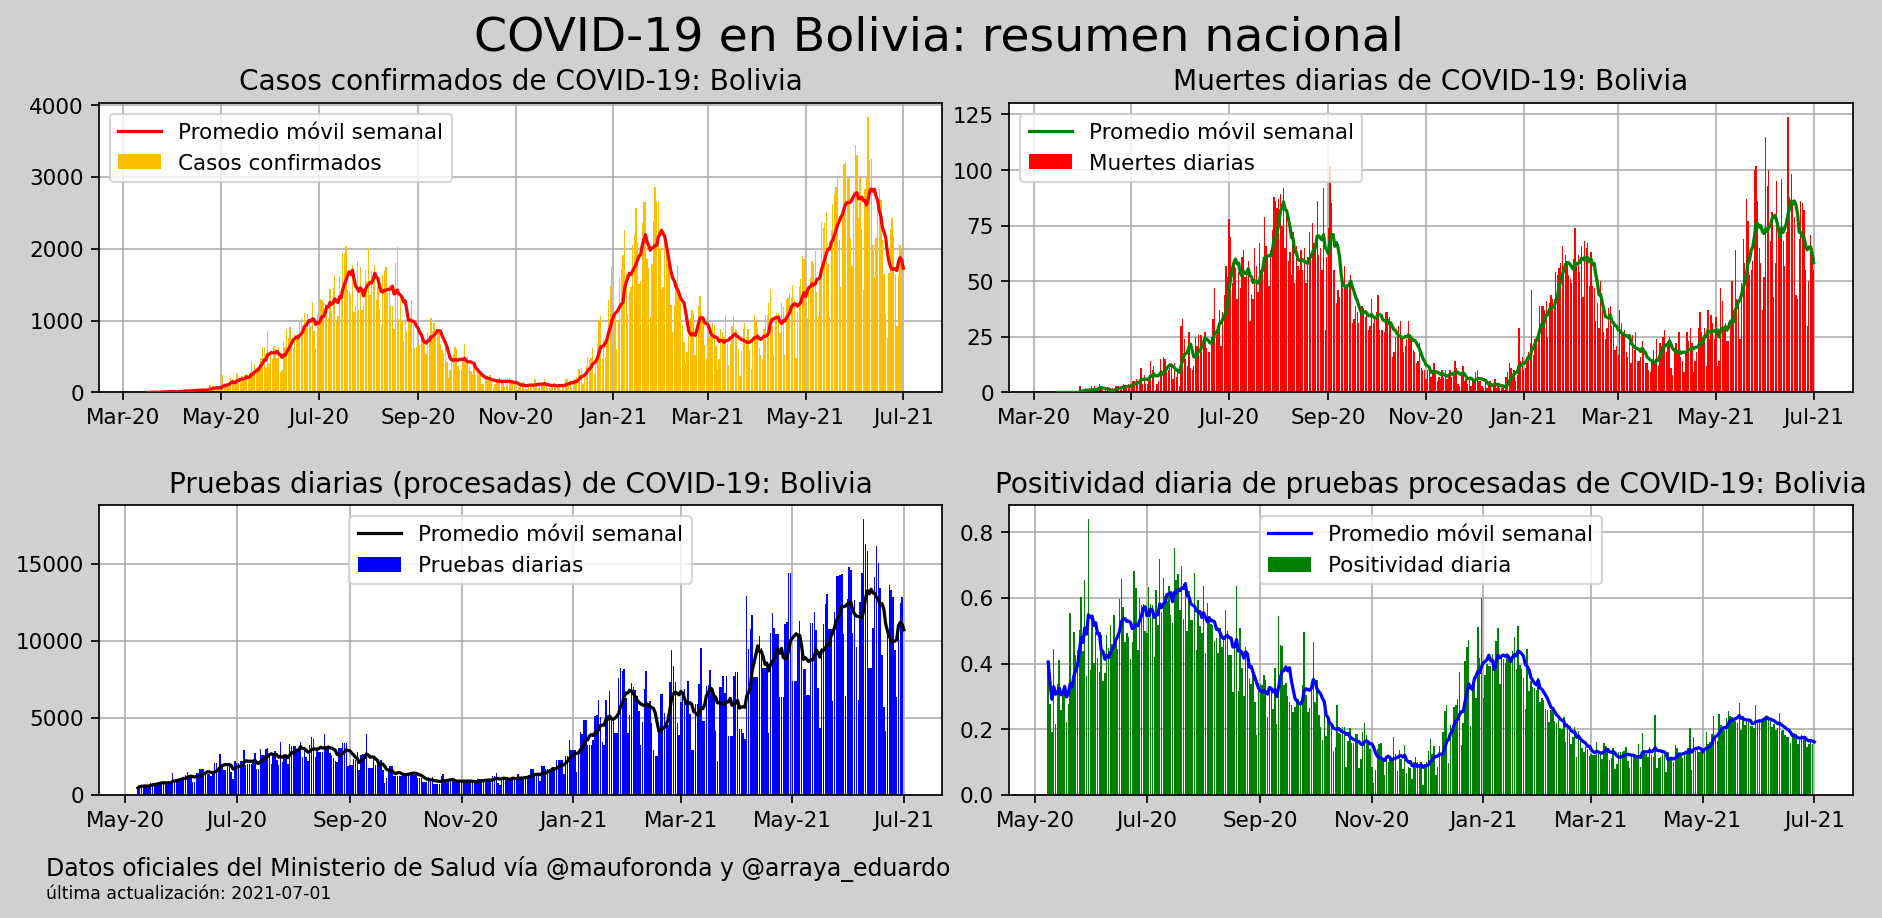

In [107]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: resumen nacional", fontsize= 22, y=1.06)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados",width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal", zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias",width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal", zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias",width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal", zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal", zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

#ACTIVOS


In [108]:
activos = casos_diarios.rolling(14).sum()-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos

Bolivia  La Paz  Cochabamba  ...  Tarija   Beni  Pando
2020-03-10      NaN     NaN         NaN  ...     NaN    NaN    NaN
2020-03-11      NaN     NaN         NaN  ...     NaN    NaN    NaN
2020-03-12      NaN     NaN         NaN  ...     NaN    NaN    NaN
2020-03-13      NaN     NaN         NaN  ...     NaN    NaN    NaN
2020-03-14      NaN     NaN         NaN  ...     NaN    NaN    NaN
...             ...     ...         ...  ...     ...    ...    ...
2021-06-27  25942.0  5079.0      5784.0  ...  1466.0  586.0  256.0
2021-06-28  25445.0  4970.0      5634.0  ...  1435.0  589.0  222.0
2021-06-29  24982.0  5142.0      5375.0  ...  1385.0  587.0  201.0
2021-06-30  24170.0  4815.0      5307.0  ...  1311.0  514.0  193.0
2021-07-01  23193.0  4576.0      5043.0  ...  1269.0  524.0  173.0

[479 rows x 10 columns]

In [109]:
act_colors = []
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap("inferno")
list(viridis(range(12)))

viridis(range(10))[3]

array([0.220057, 0.343307, 0.549413, 1.      ])

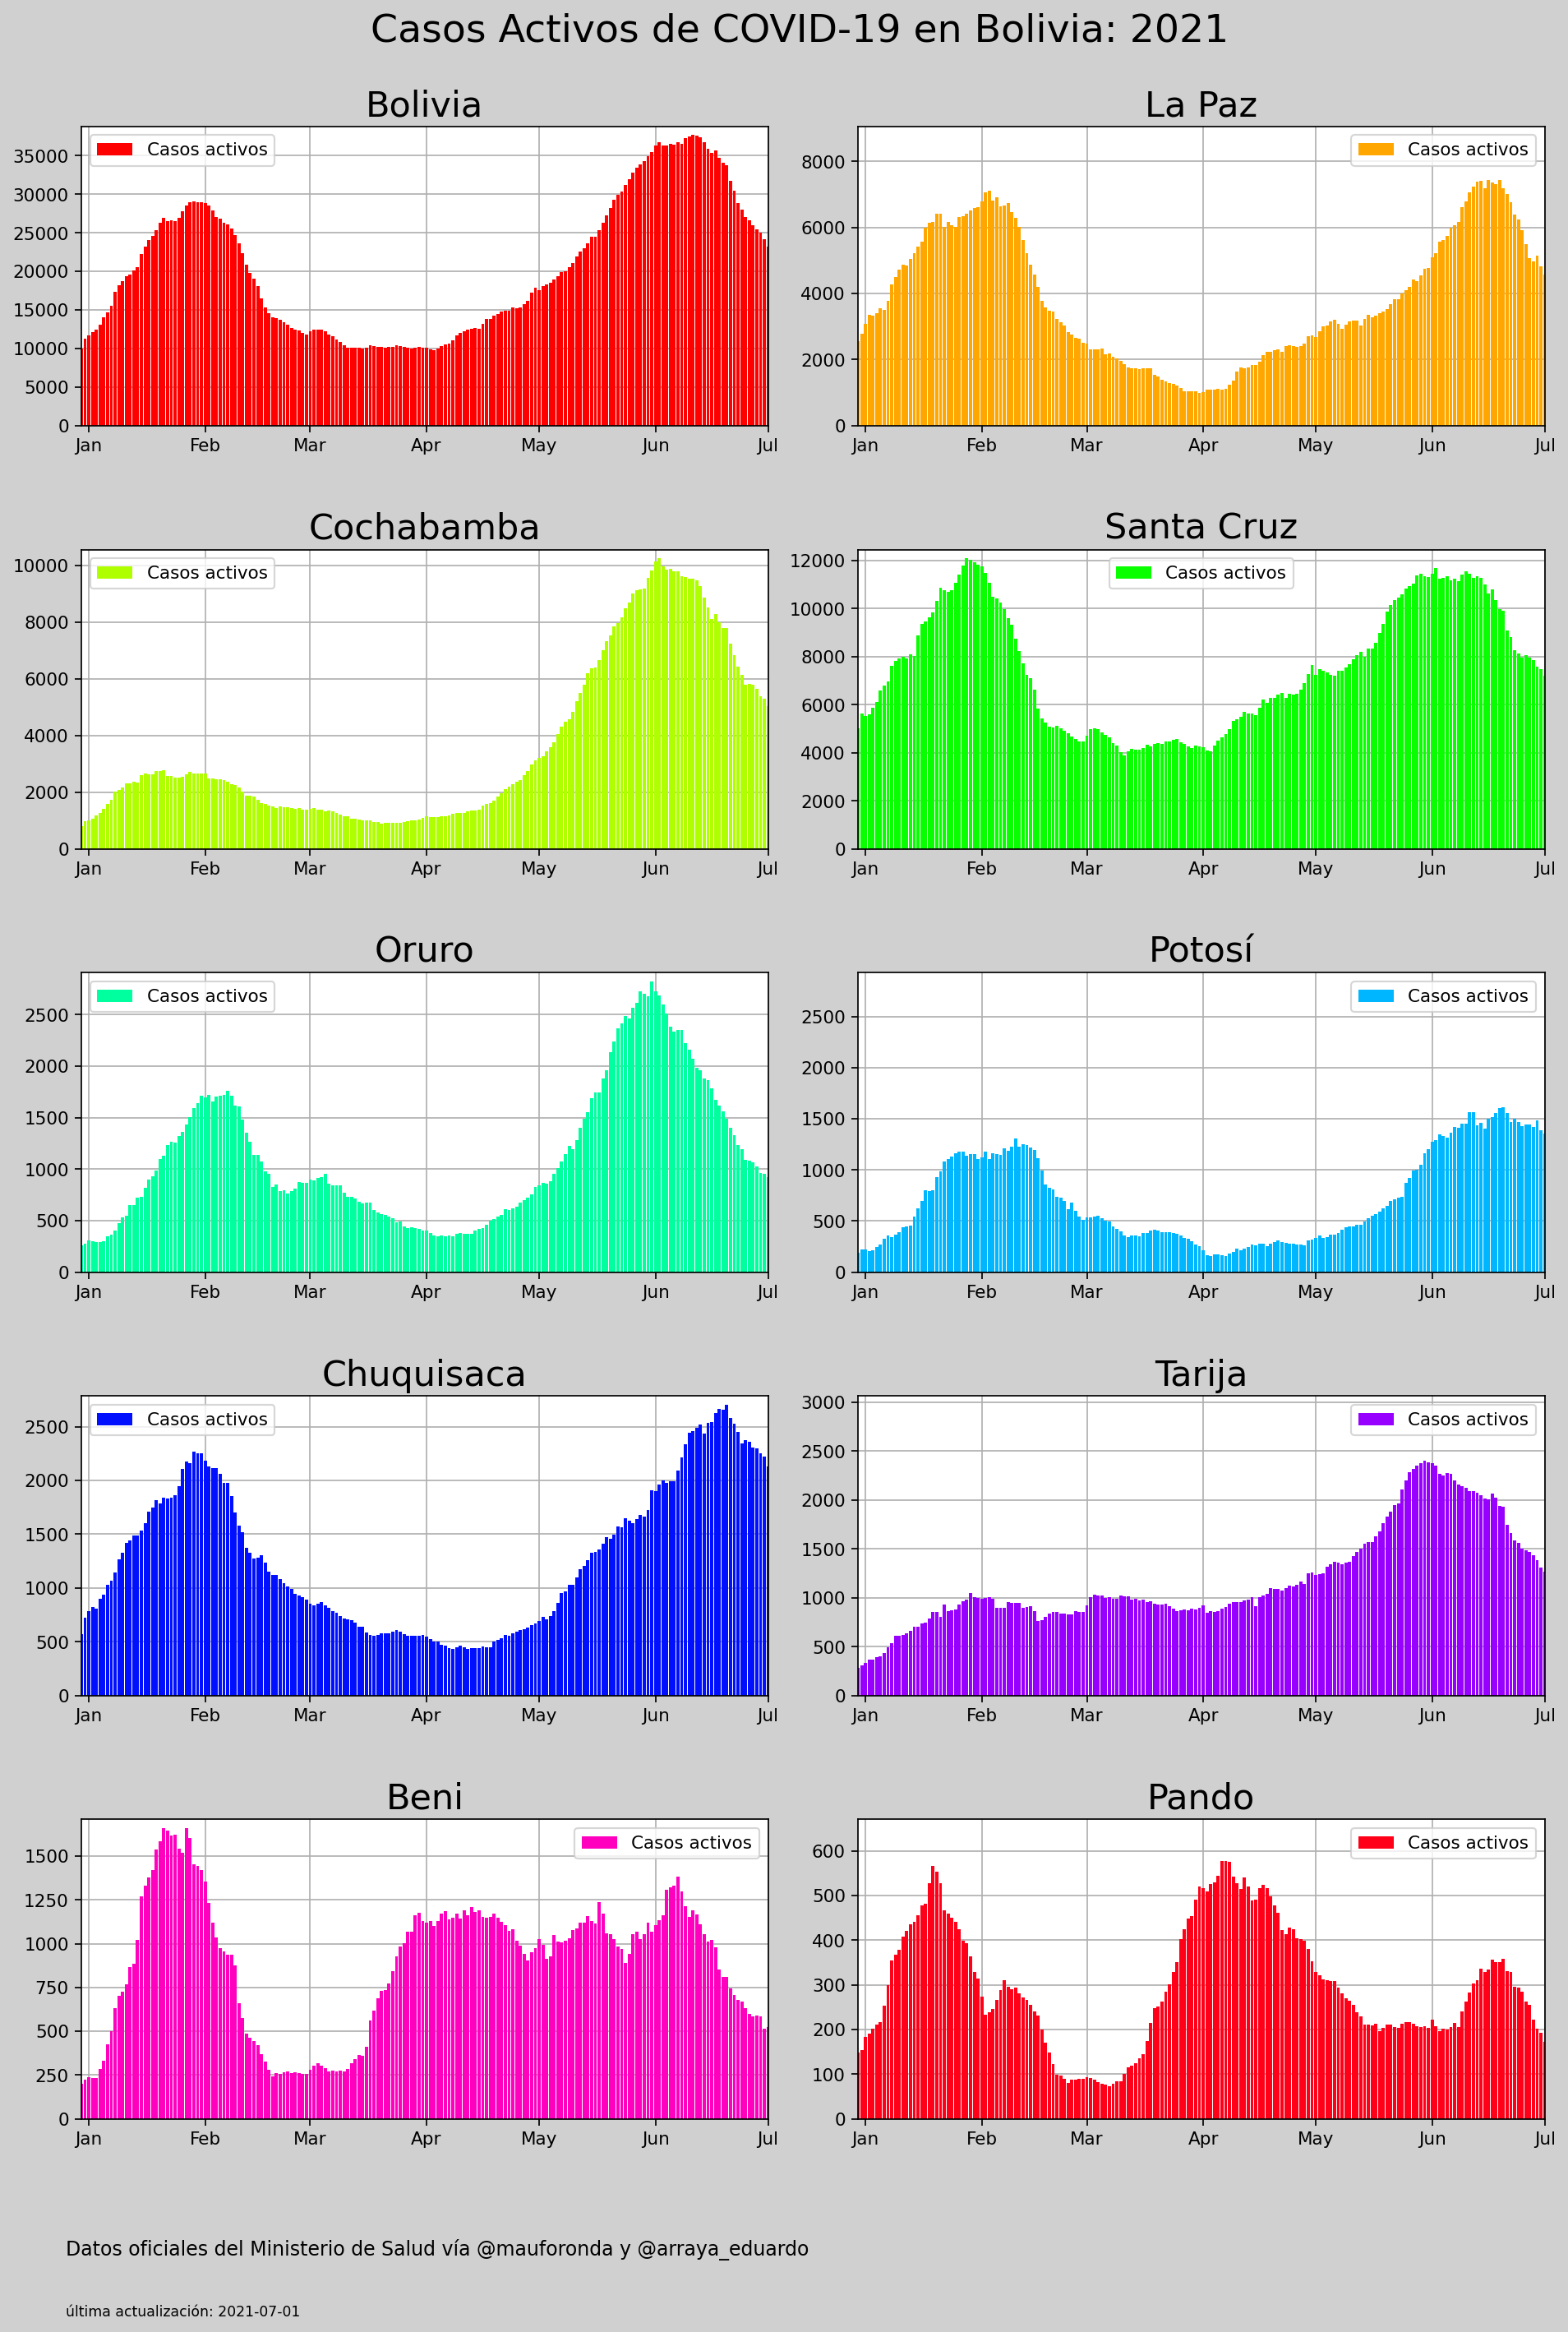

In [110]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia: 2021", fontsize= 22, y=1.05)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[295:-1].columns[i]], label="Casos activos",width=.85, zorder=2, 
              color = cm.get_cmap("hsv",10)(range(10)[i]))
   axs[i].set_facecolor(background_color2)
   axs[i].legend()
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[295], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [111]:
activos_ultimo = activos[-1:]
activos_ultimo.T


2021-07-01
Bolivia        23193.0
La Paz          4576.0
Cochabamba      5043.0
Santa Cruz      7209.0
Oruro            919.0
Potosí          1352.0
Chuquisaca      2128.0
Tarija          1269.0
Beni             524.0
Pando            173.0

In [112]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              19.959552
La Paz                               15.633755
Cochabamba                           24.854608
Santa Cruz                           21.391691
Oruro                                17.081784
Potosí                               14.988914
Chuquisaca                           33.406593
Tarija                               21.766724
Beni                                 10.916667
Pando                                11.233766

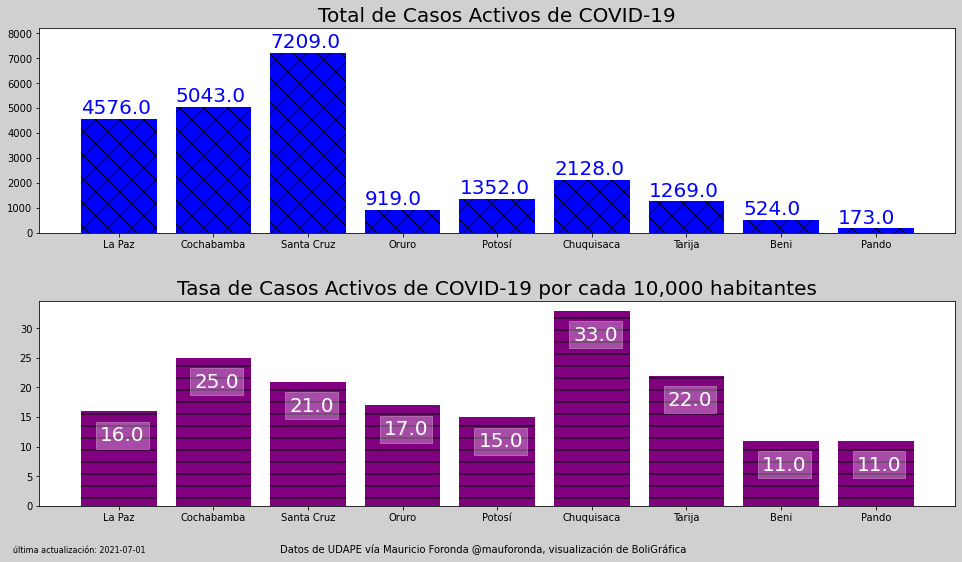

In [113]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = "b", hatch = "x")
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.14)
for p in axs[0].patches:
    axs[0].annotate(
        str(p.get_height()),
        (p.get_x() - 0,
        p.get_height()+200),
        fontsize = 20,
        color = "b")


axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           activos_ultimo_pc.T.round(decimals=0)[1:10]["Activos por cada 10,000 habitantes"],
           color = "purple", hatch = "-")
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 10,000 habitantes", fontsize = 20)

for p in axs[1].patches:
     axs[1].annotate(
         str(p.get_height()),
         xy = (p.get_x() + 0.2, p.get_height()-5),
         fontsize=20,
         color = "w",
          bbox={
            'edgecolor': 'w',
            'facecolor': 'w', 
            'alpha': 0.3}
         )



fig.tight_layout(pad=3)

fig.text(0.3,0,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica")
fig.text(.036, -.0,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)


fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")